In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential


In [2]:
!unzip /content/tree_data.zip

Archive:  /content/tree_data.zip
   creating: tree_data/Arjun/
  inflating: tree_data/Arjun/Arjun(1).jpg  
  inflating: tree_data/Arjun/Arjun(10).jpg  
  inflating: tree_data/Arjun/Arjun(11).jpg  
  inflating: tree_data/Arjun/Arjun(12).jpg  
  inflating: tree_data/Arjun/Arjun(13).jpg  
  inflating: tree_data/Arjun/Arjun(14).jpg  
  inflating: tree_data/Arjun/Arjun(15).jpg  
  inflating: tree_data/Arjun/Arjun(16).jpg  
  inflating: tree_data/Arjun/Arjun(17).jpg  
  inflating: tree_data/Arjun/Arjun(18).jpg  
  inflating: tree_data/Arjun/Arjun(19).jpg  
  inflating: tree_data/Arjun/Arjun(2).jpg  
  inflating: tree_data/Arjun/Arjun(20).jpg  
  inflating: tree_data/Arjun/Arjun(21).jpg  
  inflating: tree_data/Arjun/Arjun(22).jpg  
  inflating: tree_data/Arjun/Arjun(23).jpg  
  inflating: tree_data/Arjun/Arjun(24).jpg  
  inflating: tree_data/Arjun/Arjun(25).jpg  
  inflating: tree_data/Arjun/Arjun(26).jpg  
  inflating: tree_data/Arjun/Arjun(27).jpg  
  inflating: tree_data/Arjun/Arjun(28).

In [3]:
import pathlib
data_dir='tree_data'
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)


961


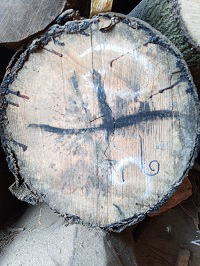

In [5]:
mango = list(data_dir.glob('Mango/*'))
PIL.Image.open(str(mango[0]))

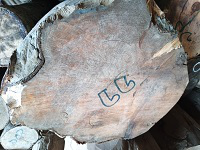

In [6]:
PIL.Image.open(str(mango[1]))

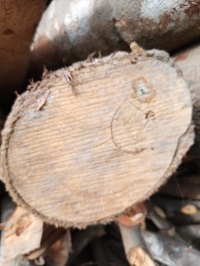

In [7]:
ashoke = list(data_dir.glob('Ashoke/*'))
PIL.Image.open(str(ashoke[0]))

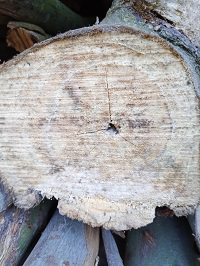

In [8]:
PIL.Image.open(str(ashoke[1]))

In [24]:
batch_size = 32
img_height = 224
img_width = 224

In [25]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 961 files belonging to 14 classes.
Using 769 files for training.


In [26]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 961 files belonging to 14 classes.
Using 192 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


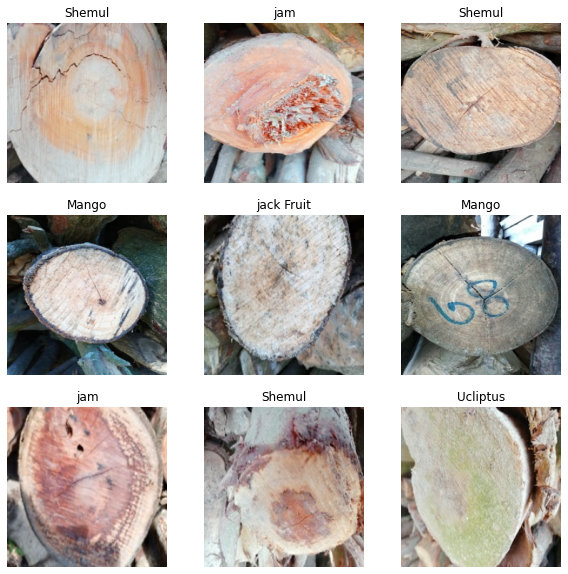

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [31]:
normalization_layer = layers.Rescaling(1./255)

In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9942031


In [33]:
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.models import Sequential
from glob import glob

In [34]:
num_classes = len(class_names)


In [35]:
model =DenseNet121(weights='imagenet')
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 1/25 [>.............................] - ETA: 15:25 - loss: 9.1060 - accuracy: 0.0000e+00

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

tree_path = '/content/tree_data/Mango/Mango(10).jpg'

img = tf.keras.utils.load_img(
    tree_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)